In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from datetime import datetime
warnings.filterwarnings(action='ignore')

train = pd.read_csv('C:/Users/jlee0/Desktop/공모전/공모전/train.csv')
test = pd.read_csv('C:/Users/jlee0/Desktop/공모전/공모전/test.csv')

In [2]:
train.head()

,id,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,...,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,contents_open_dt,target
0,0,True,True,True,False,False,False,1,4,3,...,2,1608,275,1,4,139,618822,354805,2020-01-17 12:09:36,1
1,1,False,False,False,True,True,False,1,3,4,...,2,1608,275,1,4,133,571659,346213,2020-06-18 17:48:52,0
2,2,False,False,False,True,False,False,2,0,3,...,1,1600,94,1,4,53,399816,206408,2020-07-08 20:00:10,0
3,3,False,False,False,True,False,False,2,0,2,...,2,1608,275,5,3,74,827967,572323,2020-01-13 18:09:34,0
4,4,True,True,True,False,False,False,1,3,4,...,2,1608,275,1,4,74,831614,573899,2020-03-09 20:39:22,0


In [6]:
train[train.contents_attribute_a == 3]

,id,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,...,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,contents_open_dt,target
0,0,True,True,True,False,False,False,1,4,3,...,2,1608,275,1,4,139,618822,354805,2020-01-17 12:09:36,1
1,1,False,False,False,True,True,False,1,3,4,...,2,1608,275,1,4,133,571659,346213,2020-06-18 17:48:52,0
3,3,False,False,False,True,False,False,2,0,2,...,2,1608,275,5,3,74,827967,572323,2020-01-13 18:09:34,0
5,5,False,False,False,True,False,False,1,1,2,...,2,1608,275,1,4,74,836994,580234,2020-06-29 20:46:41,1
6,6,False,False,False,True,False,False,2,0,3,...,2,1817,492,5,5,53,380340,204014,2020-04-06 10:28:44,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501942,501942,True,False,False,True,False,False,1,6,4,...,2,775,147,1,5,65,470285,286474,2020-03-24 15:08:06,1
501943,501943,True,True,False,True,False,False,1,3,4,...,2,775,147,1,5,65,473936,288995,2020-05-14 20:34:36,1
501946,501946,False,False,False,True,False,False,1,1,2,...,2,354,147,1,5,65,503156,285850,2020-03-13 12:55:52,1
501947,501947,True,True,False,True,False,False,1,6,2,...,2,163,120,1,4,142,676255,456996,2020-01-20 11:51:51,1


In [ ]:
train[train.contents_attribute_a == 3].count()

In [30]:
test.head()

,id,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,...,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,contents_open_dt
0,0,True,False,False,True,True,True,1,1,2,...,1,2,1147,839,1,5,263,393790,236865,2020-12-01 02:24:18
1,1,False,False,False,True,False,False,2,0,2,...,1,2,1611,278,1,4,263,394058,236572,2020-12-17 05:42:53
2,2,True,False,False,True,True,True,2,3,2,...,1,2,1817,490,3,4,177,1002061,704612,2020-12-10 23:33:41
3,3,True,False,False,True,True,True,1,2,2,...,1,2,101,150,5,3,177,1000813,704652,2020-12-03 19:44:55
4,4,True,False,False,True,False,False,1,6,4,...,1,1,985,1097,1,4,177,111146,704413,2020-12-11 21:24:34


#### 메타 데이터 

identity

- person_rn : 사용자 구분  

- contents_rn : 컨텐츠 구분

- contents_open_dt : 컨텐츠를 이용한 일시


target

- target : 컨텐츠 사용 여부


content attribute

- contents_attribute_i,,,h : 컨텐츠 속성 i,,,h


person attribute 

- person_attribute_a,,,h_3 : 회원 특성 a,,,h_3


match

- d(h)_l(m,s)_match_yn : 회원과 컨텐츠 속성 일치 여부

In [31]:
train.columns

Index(['id', 'd_l_match_yn', 'd_m_match_yn', 'd_s_match_yn', 'h_l_match_yn',
       'h_m_match_yn', 'h_s_match_yn', 'person_attribute_a',
       'person_attribute_a_1', 'person_attribute_b', 'person_prefer_c',
       'person_prefer_d_1', 'person_prefer_d_2', 'person_prefer_d_3',
       'person_prefer_e', 'person_prefer_f', 'person_prefer_g',
       'person_prefer_h_1', 'person_prefer_h_2', 'person_prefer_h_3',
       'contents_attribute_i', 'contents_attribute_a',
       'contents_attribute_j_1', 'contents_attribute_j',
       'contents_attribute_c', 'contents_attribute_k', 'contents_attribute_l',
       'contents_attribute_d', 'contents_attribute_m', 'contents_attribute_e',
       'contents_attribute_h', 'person_rn', 'contents_rn', 'contents_open_dt',
       'target'],
      dtype='object')

In [32]:
from typing import Dict
import numpy as np
import pandas as pd

In [33]:
def add_code(
    df: pd.DataFrame,
    d_code: Dict[int, Dict[str, int]], 
    h_code: Dict[int, Dict[str, int]], 
    l_code: Dict[int, Dict[str, int]],
) -> pd.DataFrame:
    
    # Copy input data
    df = df.copy()   

    # D Code
    df['person_prefer_d_1_n'] = df['person_prefer_d_1'].apply(lambda x: d_code[x]['속성 D 세분류코드'])
    df['person_prefer_d_1_s'] = df['person_prefer_d_1'].apply(lambda x: d_code[x]['속성 D 소분류코드'])
    df['person_prefer_d_1_m'] = df['person_prefer_d_1'].apply(lambda x: d_code[x]['속성 D 중분류코드'])
    df['person_prefer_d_1_l'] = df['person_prefer_d_1'].apply(lambda x: d_code[x]['속성 D 대분류코드'])

    df['person_prefer_d_2_n'] = df['person_prefer_d_2'].apply(lambda x: d_code[x]['속성 D 세분류코드'])
    df['person_prefer_d_2_s'] = df['person_prefer_d_2'].apply(lambda x: d_code[x]['속성 D 소분류코드'])
    df['person_prefer_d_2_m'] = df['person_prefer_d_2'].apply(lambda x: d_code[x]['속성 D 중분류코드'])
    df['person_prefer_d_2_l'] = df['person_prefer_d_2'].apply(lambda x: d_code[x]['속성 D 대분류코드'])

    df['person_prefer_d_3_n'] = df['person_prefer_d_3'].apply(lambda x: d_code[x]['속성 D 세분류코드'])
    df['person_prefer_d_3_s'] = df['person_prefer_d_3'].apply(lambda x: d_code[x]['속성 D 소분류코드'])
    df['person_prefer_d_3_m'] = df['person_prefer_d_3'].apply(lambda x: d_code[x]['속성 D 중분류코드'])
    df['person_prefer_d_3_l'] = df['person_prefer_d_3'].apply(lambda x: d_code[x]['속성 D 대분류코드'])

    df['contents_attribute_d_n'] = df['contents_attribute_d'].apply(lambda x: d_code[x]['속성 D 세분류코드'])
    df['contents_attribute_d_s'] = df['contents_attribute_d'].apply(lambda x: d_code[x]['속성 D 소분류코드'])
    df['contents_attribute_d_m'] = df['contents_attribute_d'].apply(lambda x: d_code[x]['속성 D 중분류코드'])
    df['contents_attribute_d_l'] = df['contents_attribute_d'].apply(lambda x: d_code[x]['속성 D 대분류코드'])

    # H Code
    df['person_prefer_h_1_l'] = df['person_prefer_h_1'].apply(lambda x: h_code[x]['속성 H 대분류코드'])
    df['person_prefer_h_1_m'] = df['person_prefer_h_1'].apply(lambda x: h_code[x]['속성 H 중분류코드'])
    
    df['person_prefer_h_2_l'] = df['person_prefer_h_2'].apply(lambda x: h_code[x]['속성 H 대분류코드'])
    df['person_prefer_h_2_m'] = df['person_prefer_h_2'].apply(lambda x: h_code[x]['속성 H 중분류코드'])
    
    df['person_prefer_h_3_l'] = df['person_prefer_h_3'].apply(lambda x: h_code[x]['속성 H 대분류코드'])
    df['person_prefer_h_3_m'] = df['person_prefer_h_3'].apply(lambda x: h_code[x]['속성 H 중분류코드'])

    df['contents_attribute_h_l'] = df['contents_attribute_h'].apply(lambda x: h_code[x]['속성 H 대분류코드'])
    df['contents_attribute_h_m'] = df['contents_attribute_h'].apply(lambda x: h_code[x]['속성 H 중분류코드'])

    # L Code
    df['contents_attribute_l_n'] = df['contents_attribute_l'].apply(lambda x: l_code[x]['속성 L 세분류코드'])
    df['contents_attribute_l_s'] = df['contents_attribute_l'].apply(lambda x: l_code[x]['속성 L 소분류코드'])
    df['contents_attribute_l_m'] = df['contents_attribute_l'].apply(lambda x: l_code[x]['속성 L 중분류코드'])
    df['contents_attribute_l_l'] = df['contents_attribute_l'].apply(lambda x: l_code[x]['속성 L 대분류코드'])
    
    return df

d_code = pd.read_csv('C:/Users/jlee0/Desktop/공모전/공모전/속성_D_코드.csv', index_col=0).T.to_dict()
h_code = pd.read_csv('C:/Users/jlee0/Desktop/공모전/공모전/속성_H_코드.csv', index_col=0).T.to_dict()
l_code = pd.read_csv('C:/Users/jlee0/Desktop/공모전/공모전/속성_L_코드.csv', index_col=0).T.to_dict()

train_data = pd.read_csv('C:/Users/jlee0/Desktop/공모전/공모전/train.csv')
test_data = pd.read_csv('C:/Users/jlee0/Desktop/공모전/공모전/test.csv')

train_data = add_code(train_data, d_code, h_code, l_code)
test_data = add_code(test_data, d_code, h_code, l_code)

In [34]:
print("train_data.shape: ", train_data.shape)
print("test_data.shape: ", test_data.shape)

train_data.shape:  (501951, 63)
test_data.shape:  (46404, 62)


In [35]:
train_data

,id,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,...,person_prefer_h_2_l,person_prefer_h_2_m,person_prefer_h_3_l,person_prefer_h_3_m,contents_attribute_h_l,contents_attribute_h_m,contents_attribute_l_n,contents_attribute_l_s,contents_attribute_l_m,contents_attribute_l_l
0,0,True,True,True,False,False,False,1,4,3,...,94,398,58,368,94,422,1607,1606,1605,2016
1,1,False,False,False,True,True,False,1,3,4,...,94,400,94,399,94,417,1607,1606,1605,2016
2,2,False,False,False,True,False,False,2,0,3,...,250,528,48,366,48,363,1599,1595,1572,2016
3,3,False,False,False,True,False,False,2,0,2,...,226,495,1,315,71,381,1607,1606,1605,2016
4,4,True,True,True,False,False,False,1,3,4,...,208,481,208,480,71,381,1607,1606,1605,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501946,501946,False,False,False,True,False,False,1,1,2,...,3,316,94,398,58,373,352,347,346,2006
501947,501947,True,True,False,True,False,False,1,6,2,...,94,425,94,398,94,425,155,138,99,2006
501948,501948,True,True,True,True,False,False,1,7,4,...,94,413,94,422,58,373,437,417,407,2006
501949,501949,True,False,False,True,False,False,1,1,2,...,48,359,250,523,250,524,659,652,651,2006


In [36]:
def preprocessing_contents_open_dt(data):
    data['contents_open_dt'] = data['contents_open_dt'].astype('str')
    DATE = data['contents_open_dt'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
    
    DATE = pd.DataFrame(DATE)
    DATE = DATE.rename(columns = {'contents_open_dt': 'date'})
    
    DATE['Y'] = DATE['date'].apply(lambda x: x.timetuple()[0])
    DATE['M'] = DATE['date'].apply(lambda x: x.timetuple()[1])
    DATE['D'] = DATE['date'].apply(lambda x: x.timetuple()[2])
    DATE['id'] = data['id']
    
    data = data.merge(DATE, on = 'id', how = 'left')
    data = data.drop(columns = ['date', 'contents_open_dt'])
    return data

train_data = preprocessing_contents_open_dt(train_data)
test_data = preprocessing_contents_open_dt(test_data)

# 안전하게 확인하고 넘어 갑시다. 
train_data_labels = train_data['target']
train_data, test_data = train_data.align(test_data, join = 'inner', axis = 1)
train_data['target'] = train_data_labels
print("train_data.shape: ", train_data.shape)
print("test_data.shape: ", test_data.shape)

train_data.shape:  (501951, 65)
test_data.shape:  (46404, 64)


In [37]:
train_data

,id,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,...,contents_attribute_h_l,contents_attribute_h_m,contents_attribute_l_n,contents_attribute_l_s,contents_attribute_l_m,contents_attribute_l_l,Y,M,D,target
0,0,True,True,True,False,False,False,1,4,3,...,94,422,1607,1606,1605,2016,2020,1,17,1
1,1,False,False,False,True,True,False,1,3,4,...,94,417,1607,1606,1605,2016,2020,6,18,0
2,2,False,False,False,True,False,False,2,0,3,...,48,363,1599,1595,1572,2016,2020,7,8,0
3,3,False,False,False,True,False,False,2,0,2,...,71,381,1607,1606,1605,2016,2020,1,13,0
4,4,True,True,True,False,False,False,1,3,4,...,71,381,1607,1606,1605,2016,2020,3,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501946,501946,False,False,False,True,False,False,1,1,2,...,58,373,352,347,346,2006,2020,3,13,1
501947,501947,True,True,False,True,False,False,1,6,2,...,94,425,155,138,99,2006,2020,1,20,1
501948,501948,True,True,True,True,False,False,1,7,4,...,58,373,437,417,407,2006,2020,8,5,1
501949,501949,True,False,False,True,False,False,1,1,2,...,250,524,659,652,651,2006,2020,6,15,1


In [38]:
job_data = train_data.copy()
job_data_test = test_data.copy()

In [39]:
job_data.columns

Index(['id', 'd_l_match_yn', 'd_m_match_yn', 'd_s_match_yn', 'h_l_match_yn',
       'h_m_match_yn', 'h_s_match_yn', 'person_attribute_a',
       'person_attribute_a_1', 'person_attribute_b', 'person_prefer_c',
       'person_prefer_d_1', 'person_prefer_d_2', 'person_prefer_d_3',
       'person_prefer_e', 'person_prefer_f', 'person_prefer_g',
       'person_prefer_h_1', 'person_prefer_h_2', 'person_prefer_h_3',
       'contents_attribute_i', 'contents_attribute_a',
       'contents_attribute_j_1', 'contents_attribute_j',
       'contents_attribute_c', 'contents_attribute_k', 'contents_attribute_l',
       'contents_attribute_d', 'contents_attribute_m', 'contents_attribute_e',
       'contents_attribute_h', 'person_rn', 'contents_rn',
       'person_prefer_d_1_n', 'person_prefer_d_1_s', 'person_prefer_d_1_m',
       'person_prefer_d_1_l', 'person_prefer_d_2_n', 'person_prefer_d_2_s',
       'person_prefer_d_2_m', 'person_prefer_d_2_l', 'person_prefer_d_3_n',
       'person_prefer_d_3_s',

In [66]:
set(job_data['person_prefer_d_1_n'].unique())

{4,
 5,
 7,
 8,
 14,
 15,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 30,
 33,
 34,
 38,
 41,
 42,
 44,
 45,
 46,
 53,
 57,
 59,
 60,
 64,
 65,
 66,
 69,
 73,
 76,
 77,
 80,
 84,
 85,
 86,
 87,
 90,
 92,
 97,
 101,
 108,
 110,
 114,
 124,
 131,
 136,
 145,
 153,
 159,
 171,
 174,
 175,
 182,
 191,
 192,
 193,
 194,
 195,
 196,
 198,
 199,
 200,
 201,
 205,
 209,
 211,
 212,
 218,
 219,
 222,
 223,
 225,
 229,
 230,
 233,
 234,
 238,
 243,
 246,
 254,
 257,
 259,
 263,
 264,
 268,
 269,
 270,
 273,
 275,
 276,
 283,
 289,
 290,
 293,
 296,
 299,
 310,
 311,
 313,
 314,
 316,
 324,
 331,
 333,
 339,
 341,
 344,
 345,
 351,
 352,
 354,
 355,
 357,
 358,
 360,
 361,
 365,
 366,
 367,
 369,
 376,
 380,
 381,
 383,
 393,
 394,
 395,
 396,
 398,
 412,
 415,
 424,
 430,
 432,
 435,
 436,
 442,
 443,
 444,
 446,
 452,
 457,
 460,
 461,
 462,
 464,
 465,
 472,
 474,
 475,
 476,
 478,
 480,
 481,
 484,
 485,
 486,
 488,
 489,
 490,
 494,
 496,
 497,
 498,
 499,
 500,
 503,
 504,
 505,
 510,
 511,
 5

In [67]:
set(job_data['person_prefer_d_1_s'].unique())

{3,
 6,
 16,
 29,
 37,
 43,
 57,
 58,
 63,
 72,
 83,
 91,
 109,
 123,
 152,
 190,
 197,
 210,
 217,
 221,
 224,
 232,
 238,
 242,
 258,
 270,
 273,
 274,
 298,
 312,
 315,
 332,
 340,
 353,
 356,
 359,
 368,
 379,
 382,
 396,
 397,
 431,
 440,
 446,
 451,
 463,
 470,
 473,
 477,
 483,
 488,
 489,
 490,
 494,
 495,
 509,
 524,
 537,
 540,
 547,
 560,
 586,
 600,
 603,
 620,
 636,
 645,
 652,
 655,
 656,
 660,
 677,
 691,
 703,
 708,
 717,
 735,
 746,
 747,
 775,
 782,
 783,
 810,
 815,
 825,
 831,
 847,
 853,
 865,
 884,
 901,
 909,
 915,
 923,
 928,
 951,
 961,
 982,
 985,
 988,
 996,
 1001,
 1008,
 1017,
 1026,
 1036,
 1042,
 1054,
 1062,
 1077,
 1078,
 1083,
 1086,
 1094,
 1098,
 1105,
 1111,
 1129,
 1138,
 1150,
 1158,
 1164,
 1170,
 1173,
 1180,
 1194,
 1204,
 1211,
 1217,
 1220,
 1227,
 1236,
 1244,
 1248,
 1251,
 1254,
 1258}

# Naive modeling

In [40]:
#job_data의 bool형 값들을 1,0으로 대체한다.

for column in job_data.select_dtypes(include='bool').columns:
    job_data[column] = job_data[column].astype(int)
    
for column in job_data_test.select_dtypes(include='bool').columns:
    job_data_test[column] = job_data_test[column].astype(int)

In [41]:
job_data

,id,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,...,contents_attribute_h_l,contents_attribute_h_m,contents_attribute_l_n,contents_attribute_l_s,contents_attribute_l_m,contents_attribute_l_l,Y,M,D,target
0,0,1,1,1,0,0,0,1,4,3,...,94,422,1607,1606,1605,2016,2020,1,17,1
1,1,0,0,0,1,1,0,1,3,4,...,94,417,1607,1606,1605,2016,2020,6,18,0
2,2,0,0,0,1,0,0,2,0,3,...,48,363,1599,1595,1572,2016,2020,7,8,0
3,3,0,0,0,1,0,0,2,0,2,...,71,381,1607,1606,1605,2016,2020,1,13,0
4,4,1,1,1,0,0,0,1,3,4,...,71,381,1607,1606,1605,2016,2020,3,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501946,501946,0,0,0,1,0,0,1,1,2,...,58,373,352,347,346,2006,2020,3,13,1
501947,501947,1,1,0,1,0,0,1,6,2,...,94,425,155,138,99,2006,2020,1,20,1
501948,501948,1,1,1,1,0,0,1,7,4,...,58,373,437,417,407,2006,2020,8,5,1
501949,501949,1,0,0,1,0,0,1,1,2,...,250,524,659,652,651,2006,2020,6,15,1


In [42]:
job_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 501951 entries, 0 to 501950
Data columns (total 65 columns):
 #   Column                  Non-Null Count   Dtype
---  ------                  --------------   -----
 0   id                      501951 non-null  int64
 1   d_l_match_yn            501951 non-null  int32
 2   d_m_match_yn            501951 non-null  int32
 3   d_s_match_yn            501951 non-null  int32
 4   h_l_match_yn            501951 non-null  int32
 5   h_m_match_yn            501951 non-null  int32
 6   h_s_match_yn            501951 non-null  int32
 7   person_attribute_a      501951 non-null  int64
 8   person_attribute_a_1    501951 non-null  int64
 9   person_attribute_b      501951 non-null  int64
 10  person_prefer_c         501951 non-null  int64
 11  person_prefer_d_1       501951 non-null  int64
 12  person_prefer_d_2       501951 non-null  int64
 13  person_prefer_d_3       501951 non-null  int64
 14  person_prefer_e         501951 non-null  int64
 15  

In [71]:
job_data[['id','person_rn','contents_rn','target']]

,id,person_rn,contents_rn,target
0,0,618822,354805,1
1,1,571659,346213,0
2,2,399816,206408,0
3,3,827967,572323,0
4,4,831614,573899,0
...,...,...,...,...
501946,501946,503156,285850,1
501947,501947,676255,456996,1
501948,501948,484528,293258,1
501949,501949,456330,273797,1


In [73]:
len(set(job_data['person_rn'].unique()))

300177

In [74]:
len(set(job_data['contents_rn'].unique()))

283359

In [77]:
set(job_data['contents_rn'].unique())

{524288,
 524291,
 524292,
 524303,
 20,
 21,
 524317,
 524348,
 524351,
 524352,
 524360,
 524368,
 524369,
 524374,
 524376,
 97,
 524386,
 524392,
 524393,
 729466,
 524399,
 524400,
 524402,
 524404,
 524410,
 524411,
 124,
 524415,
 132,
 524423,
 524427,
 524430,
 524443,
 159,
 125049,
 524453,
 524455,
 524457,
 524466,
 524483,
 200,
 524494,
 524495,
 524498,
 212,
 213,
 524505,
 524507,
 524510,
 226,
 524517,
 524518,
 237,
 524526,
 524527,
 524529,
 524534,
 524535,
 248,
 524537,
 729494,
 524542,
 524545,
 259,
 524547,
 261,
 524550,
 262,
 524552,
 265,
 524548,
 266,
 268,
 524557,
 524558,
 269,
 524560,
 524561,
 524562,
 275,
 524556,
 524567,
 524569,
 284,
 524573,
 288,
 524577,
 524581,
 296,
 297,
 298,
 524588,
 524592,
 304,
 524594,
 309,
 524598,
 524603,
 317,
 524606,
 524612,
 325,
 524614,
 524616,
 330,
 331,
 524618,
 335,
 336,
 524624,
 524628,
 341,
 524629,
 524633,
 524634,
 348,
 349,
 350,
 524637,
 353,
 524644,
 358,
 524647,
 524648,
 364

In [78]:
job_data[job_data['contents_rn'] == 524288]

,id,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,...,contents_attribute_h_l,contents_attribute_h_m,contents_attribute_l_n,contents_attribute_l_s,contents_attribute_l_m,contents_attribute_l_l,Y,M,D,target
354916,354916,1,0,0,1,0,0,1,5,2,...,94,420,1580,1579,1572,2016,2020,2,4,0


In [85]:
job_data[job_data['contents_rn'] == 524291]

,id,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,...,contents_attribute_h_l,contents_attribute_h_m,contents_attribute_l_n,contents_attribute_l_s,contents_attribute_l_m,contents_attribute_l_l,Y,M,D,target
331444,331444,1,0,0,0,0,0,2,5,2,...,94,420,1021,1021,1021,2010,2020,1,15,0


In [83]:
set(job_data['person_rn'].unique())

{524291,
 524292,
 524294,
 7,
 524295,
 1048582,
 524300,
 524301,
 1048590,
 524303,
 524304,
 524306,
 1048596,
 21,
 524310,
 1048600,
 27,
 524316,
 29,
 30,
 31,
 524320,
 33,
 1048608,
 524321,
 36,
 524322,
 39,
 524327,
 41,
 42,
 1048619,
 524331,
 40,
 46,
 524334,
 524336,
 49,
 1048620,
 524340,
 524341,
 1048630,
 54,
 1048631,
 524345,
 524346,
 1048635,
 524348,
 1048637,
 524350,
 64,
 524353,
 524355,
 1048644,
 70,
 524360,
 72,
 524362,
 1048649,
 1048652,
 524364,
 78,
 77,
 1048653,
 1048657,
 524369,
 524373,
 524374,
 1048661,
 88,
 524378,
 1048669,
 524382,
 95,
 524384,
 524385,
 1048674,
 98,
 97,
 101,
 94,
 100,
 1048680,
 524390,
 106,
 1048682,
 1048683,
 104228,
 1048686,
 524400,
 113,
 524403,
 524404,
 117,
 119,
 1048696,
 122,
 123,
 524413,
 1048702,
 524415,
 127,
 129,
 524417,
 524420,
 1048708,
 1048710,
 524421,
 524424,
 1048709,
 524426,
 139,
 524429,
 524430,
 524431,
 1048720,
 524432,
 524435,
 524437,
 524438,
 150,
 154,
 104237,
 524

In [84]:
job_data[job_data['person_rn'] == 524291]

,id,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,...,contents_attribute_h_l,contents_attribute_h_m,contents_attribute_l_n,contents_attribute_l_s,contents_attribute_l_m,contents_attribute_l_l,Y,M,D,target
416249,416249,1,1,1,1,0,0,1,6,2,...,58,376,664,663,651,2006,2020,3,4,1


In [86]:
job_data.columns

Index(['id', 'd_l_match_yn', 'd_m_match_yn', 'd_s_match_yn', 'h_l_match_yn',
       'h_m_match_yn', 'h_s_match_yn', 'person_attribute_a',
       'person_attribute_a_1', 'person_attribute_b', 'person_prefer_c',
       'person_prefer_d_1', 'person_prefer_d_2', 'person_prefer_d_3',
       'person_prefer_e', 'person_prefer_f', 'person_prefer_g',
       'person_prefer_h_1', 'person_prefer_h_2', 'person_prefer_h_3',
       'contents_attribute_i', 'contents_attribute_a',
       'contents_attribute_j_1', 'contents_attribute_j',
       'contents_attribute_c', 'contents_attribute_k', 'contents_attribute_l',
       'contents_attribute_d', 'contents_attribute_m', 'contents_attribute_e',
       'contents_attribute_h', 'person_rn', 'contents_rn',
       'person_prefer_d_1_n', 'person_prefer_d_1_s', 'person_prefer_d_1_m',
       'person_prefer_d_1_l', 'person_prefer_d_2_n', 'person_prefer_d_2_s',
       'person_prefer_d_2_m', 'person_prefer_d_2_l', 'person_prefer_d_3_n',
       'person_prefer_d_3_s',

In [88]:
job_data[job_data['person_rn'] == 524291][['contents_attribute_i', 'contents_attribute_a','contents_attribute_j_1', 'contents_attribute_j','contents_attribute_c', 'contents_attribute_k']]

,contents_attribute_i,contents_attribute_a,contents_attribute_j_1,contents_attribute_j,contents_attribute_c,contents_attribute_k
416249,3,3,5,1,1,2


In [90]:
job_data[(job_data['contents_attribute_i'] == 3) & (job_data['contents_attribute_a'] == 3) &(job_data['contents_attribute_j_1'] == 5) &(job_data['contents_attribute_c'] == 1) &(job_data['contents_attribute_k'] == 2)]

,id,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,...,contents_attribute_h_l,contents_attribute_h_m,contents_attribute_l_n,contents_attribute_l_s,contents_attribute_l_m,contents_attribute_l_l,Y,M,D,target
5,5,0,0,0,1,0,0,1,1,2,...,71,381,1607,1606,1605,2016,2020,6,29,1
8,8,1,1,0,1,0,0,1,1,2,...,94,422,529,528,527,2006,2020,10,13,0
13,13,1,0,0,1,0,0,1,5,3,...,94,422,529,528,527,2006,2020,5,9,0
29,29,1,0,0,1,0,0,1,1,2,...,3,333,1460,1459,1458,2013,2020,1,11,1
30,30,1,1,0,1,0,0,2,0,3,...,48,364,763,760,759,2006,2020,10,23,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501936,501936,1,1,1,1,1,1,1,3,2,...,208,482,693,693,693,2006,2020,6,23,1
501937,501937,1,1,0,1,1,1,1,5,2,...,208,482,693,693,693,2006,2020,6,4,1
501939,501939,1,1,0,1,0,0,1,3,4,...,58,373,437,417,407,2006,2020,9,13,1
501946,501946,0,0,0,1,0,0,1,1,2,...,58,373,352,347,346,2006,2020,3,13,1


### feature importance 

랜덤 포레스트로 피쳐 중요도 뽑기

In [50]:
# 전체 데이터에서 랜덤하게 10000개만 뽑아서 임포턴스 확인해보겠다

sample = job_data.sample(n=10000, # number of items from axis to return.
          random_state=1004) # seed for random number generator for reproducibility

sample

,id,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,...,contents_attribute_h_l,contents_attribute_h_m,contents_attribute_l_n,contents_attribute_l_s,contents_attribute_l_m,contents_attribute_l_l,Y,M,D,target
104816,104816,1,1,0,1,1,1,1,1,4,...,3,332,1580,1579,1572,2016,2020,10,26,1
236806,236806,1,0,0,1,0,0,2,0,4,...,30,349,1846,1843,1832,2020,2020,1,20,0
440703,440703,1,1,1,1,1,1,1,1,3,...,85,395,759,759,759,2006,2020,4,23,1
473,473,1,0,0,0,0,0,1,5,3,...,277,543,869,869,869,2007,2020,8,19,1
339145,339145,0,0,0,0,0,0,2,0,3,...,277,557,1348,1331,1323,2011,2020,2,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246254,246254,0,0,0,1,1,1,1,3,4,...,71,384,1574,1573,1572,2016,2020,9,22,0
300766,300766,0,0,0,0,0,0,1,1,4,...,58,374,1715,1714,1713,2018,2020,5,11,0
47427,47427,1,0,0,1,1,1,1,4,2,...,85,395,759,759,759,2006,2020,2,28,0
188879,188879,1,1,0,1,0,0,2,0,2,...,208,481,1021,1021,1021,2010,2020,8,5,0


In [61]:
train,test=train_test_split(sample,test_size=0.3,random_state=0)
train_X=train[train.columns[0:63]]
train_Y=train[train.columns[64]]
test_X=test[test.columns[0:63]]
test_Y=test[test.columns[64]]
X=sample[sample.columns[0:63]]
X = X.drop(['id'],axis = 1)
Y=sample['target']

Text(0.5, 1.0, 'Feature Importance in Random Forests')

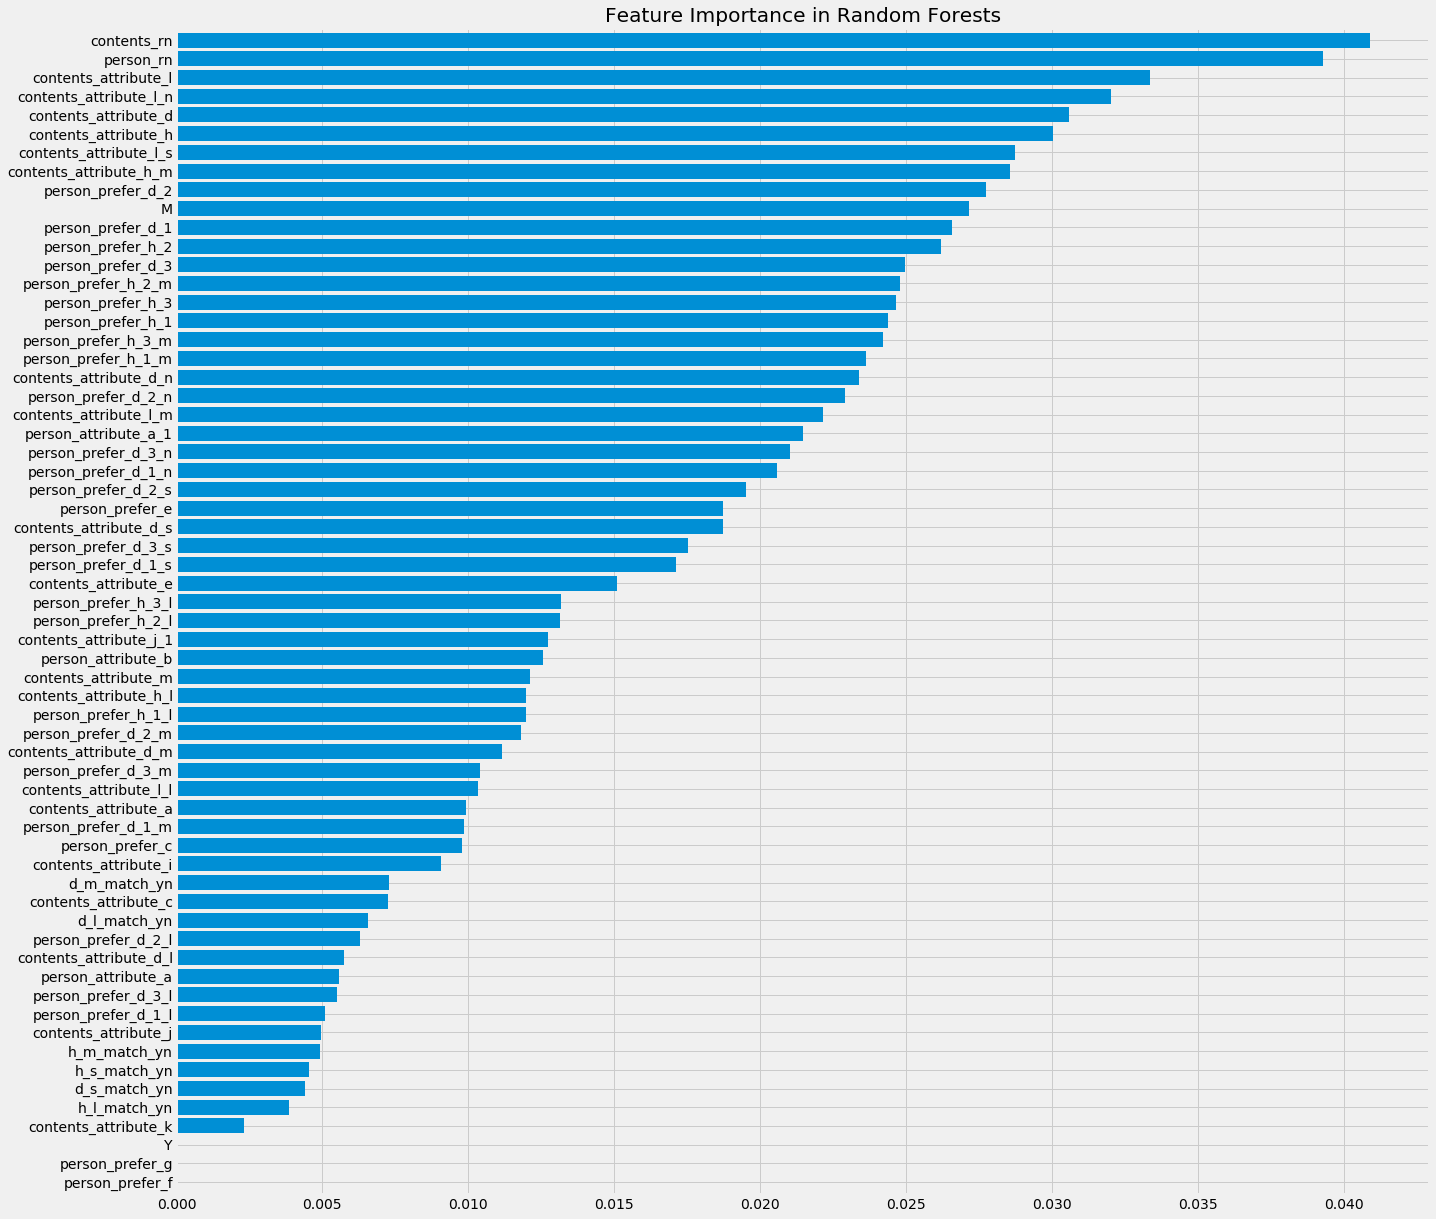

In [63]:
from sklearn.ensemble import RandomForestClassifier #Random Forest

f,ax=plt.subplots(figsize = (20,20))
model=RandomForestClassifier(n_estimators=500,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8)
ax.set_title('Feature Importance in Random Forests')

In [ ]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

In [46]:
train,test=train_test_split(job_data,test_size=0.3,random_state=0)
train_X=train[train.columns[0:63]]
train_Y=train[train.columns[64]]
test_X=test[test.columns[0:63]]
test_Y=test[test.columns[64]]
X=job_data[job_data.columns[0:63]]
Y=job_data['target']

In [ ]:
model=svm.SVC(kernel='rbf',C=1,gamma=0.1)
model.fit(train_X,train_Y)
prediction1=model.predict(test_X)
print('Accuracy for rbf SVM is ',metrics.accuracy_score(prediction1,test_Y))

In [ ]:
model=svm.SVC(kernel='linear',C=0.1,gamma=0.1)
model.fit(train_X,train_Y)
prediction2=model.predict(test_X)
print('Accuracy for linear SVM is',metrics.accuracy_score(prediction2,test_Y))

In [19]:
model = LogisticRegression()
model.fit(train_X,train_Y)
prediction3=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction3,test_Y))

The accuracy of the Logistic Regression is 0.6383129905834539


In [20]:
model=DecisionTreeClassifier()
model.fit(train_X,train_Y)
prediction4=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction4,test_Y))

The accuracy of the Decision Tree is 0.6614891158540634


In [21]:
model=KNeighborsClassifier() 
model.fit(train_X,train_Y)
prediction5=model.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction5,test_Y))

The accuracy of the KNN is 0.6558378600932357


In [24]:
a_index=list(range(1,11))
a=pd.Series()
x=[0,1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(train_X,train_Y)
    prediction=model.predict(test_X)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,test_Y)))
plt.plot(a_index, a)
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Accuracies for different values of n are:',a.values,'with the max value as ',a.values.max())

KeyboardInterrupt: 

In [23]:
model=GaussianNB()

model.fit(train_X,train_Y)
prediction6=model.predict(test_X)
print('The accuracy of the NaiveBayes is',metrics.accuracy_score(prediction6,test_Y))

The accuracy of the NaiveBayes is 0.6131579296880189


In [22]:
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_Y)
prediction7=model.predict(test_X)
print('The accuracy of the Random Forests is',metrics.accuracy_score(prediction7,test_Y))

The accuracy of the Random Forests is 0.7255123318236755


### 명목형 변수 모두 one-hot encoding 후 모델링(naive)

In [91]:
# one_hot encoding, 결측치 없이

def one_hot_encoding(data,columns):
    data = pd.get_dummies(data = data, columns = columns)
    
    return data

In [94]:
metadata = pd.read_csv('C:/Users/jlee0/Desktop/공모전/공모전/metadata.csv')

metadata

,columns,type
0,d_l_match_yn,bool
1,d_m_match_yn,bool
2,d_s_match_yn,bool
3,h_l_match_yn,bool
4,h_m_match_yn,bool
5,h_s_match_yn,bool
6,person_attribute_a_1,ordinal
7,person_attribute_b,ordinal
8,contents_attribute_e,ordinal
9,person_prefer_e,ordinal


In [97]:
cols = list(metadata[metadata['type'] == 'nomial']['columns'])
print(cols)

['person_attribute_a', 'person_prefer_c', 'person_prefer_d_1', 'person_prefer_d_2', 'person_prefer_d_3', 'person_prefer_f', 'person_prefer_g', 'person_prefer_h_1', 'person_prefer_h_2', 'person_prefer_h_3', 'contents_attribute_i', 'contents_attribute_a', 'contents_attribute_j_1', 'contents_attribute_j', 'contents_attribute_c', 'contents_attribute_k', 'contents_attribute_l', 'contents_attribute_d', 'contents_attribute_m', 'contents_attribute_h']


In [98]:
job_data = one_hot_encoding(job_data,cols)

job_data

,id,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a_1,person_attribute_b,person_prefer_e,...,contents_attribute_h_294,contents_attribute_h_295,contents_attribute_h_296,contents_attribute_h_297,contents_attribute_h_298,contents_attribute_h_299,contents_attribute_h_300,contents_attribute_h_301,contents_attribute_h_310,contents_attribute_h_311
0,0,1,1,1,0,0,0,4,3,8,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,1,1,0,3,4,4,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,1,0,0,0,3,3,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,1,0,0,0,2,3,...,0,0,0,0,0,0,0,0,0,0
4,4,1,1,1,0,0,0,3,4,4,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501946,501946,0,0,0,1,0,0,1,2,3,...,0,0,0,0,0,0,0,0,0,0
501947,501947,1,1,0,1,0,0,6,2,4,...,0,0,0,0,0,0,0,0,0,0
501948,501948,1,1,1,1,0,0,7,4,4,...,0,0,0,0,0,0,0,0,0,0
501949,501949,1,0,0,1,0,0,1,2,4,...,0,0,0,0,0,0,0,0,0,0


In [104]:
# 전체 데이터에서 랜덤하게 10000개만 뽑아서 임포턴스 확인해보겠다

sample = job_data.sample(n=10000, # number of items from axis to return.
          random_state=1004) # seed for random number generator for reproducibility

sample

,id,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a_1,person_attribute_b,person_prefer_e,...,contents_attribute_h_294,contents_attribute_h_295,contents_attribute_h_296,contents_attribute_h_297,contents_attribute_h_298,contents_attribute_h_299,contents_attribute_h_300,contents_attribute_h_301,contents_attribute_h_310,contents_attribute_h_311
104816,104816,1,1,0,1,1,1,1,4,0,...,0,0,0,0,0,0,0,0,0,0
236806,236806,1,0,0,1,0,0,0,4,3,...,0,0,0,0,0,0,0,0,0,0
440703,440703,1,1,1,1,1,1,1,3,4,...,0,0,0,0,0,0,0,0,0,0
473,473,1,0,0,0,0,0,5,3,5,...,0,0,0,0,0,0,0,0,0,0
339145,339145,0,0,0,0,0,0,0,3,5,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246254,246254,0,0,0,1,1,1,3,4,4,...,0,0,0,0,0,0,0,0,0,0
300766,300766,0,0,0,0,0,0,1,4,0,...,0,0,0,0,0,0,0,0,0,0
47427,47427,1,0,0,1,1,1,4,2,3,...,0,0,0,0,0,0,0,0,0,0
188879,188879,1,1,0,1,0,0,0,2,3,...,0,0,0,0,0,0,0,0,0,0


In [107]:
X=sample
X = X.drop(['id','target'],axis = 1)
Y=sample['target']

In [108]:
X

,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a_1,person_attribute_b,person_prefer_e,contents_attribute_e,...,contents_attribute_h_294,contents_attribute_h_295,contents_attribute_h_296,contents_attribute_h_297,contents_attribute_h_298,contents_attribute_h_299,contents_attribute_h_300,contents_attribute_h_301,contents_attribute_h_310,contents_attribute_h_311
104816,1,1,0,1,1,1,1,4,0,4,...,0,0,0,0,0,0,0,0,0,0
236806,1,0,0,1,0,0,0,4,3,3,...,0,0,0,0,0,0,0,0,0,0
440703,1,1,1,1,1,1,1,3,4,3,...,0,0,0,0,0,0,0,0,0,0
473,1,0,0,0,0,0,5,3,5,5,...,0,0,0,0,0,0,0,0,0,0
339145,0,0,0,0,0,0,0,3,5,3,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246254,0,0,0,1,1,1,3,4,4,3,...,0,0,0,0,0,0,0,0,0,0
300766,0,0,0,0,0,0,1,4,0,4,...,0,0,0,0,0,0,0,0,0,0
47427,1,0,0,1,1,1,4,2,3,3,...,0,0,0,0,0,0,0,0,0,0
188879,1,1,0,1,0,0,0,2,3,3,...,0,0,0,0,0,0,0,0,0,0


In [109]:
Y

104816    1
236806    0
440703    1
473       1
339145    0
         ..
246254    0
300766    0
47427     0
188879    0
55184     0
Name: target, Length: 10000, dtype: int64

ValueError: Length of passed values is 5, index implies 7201.

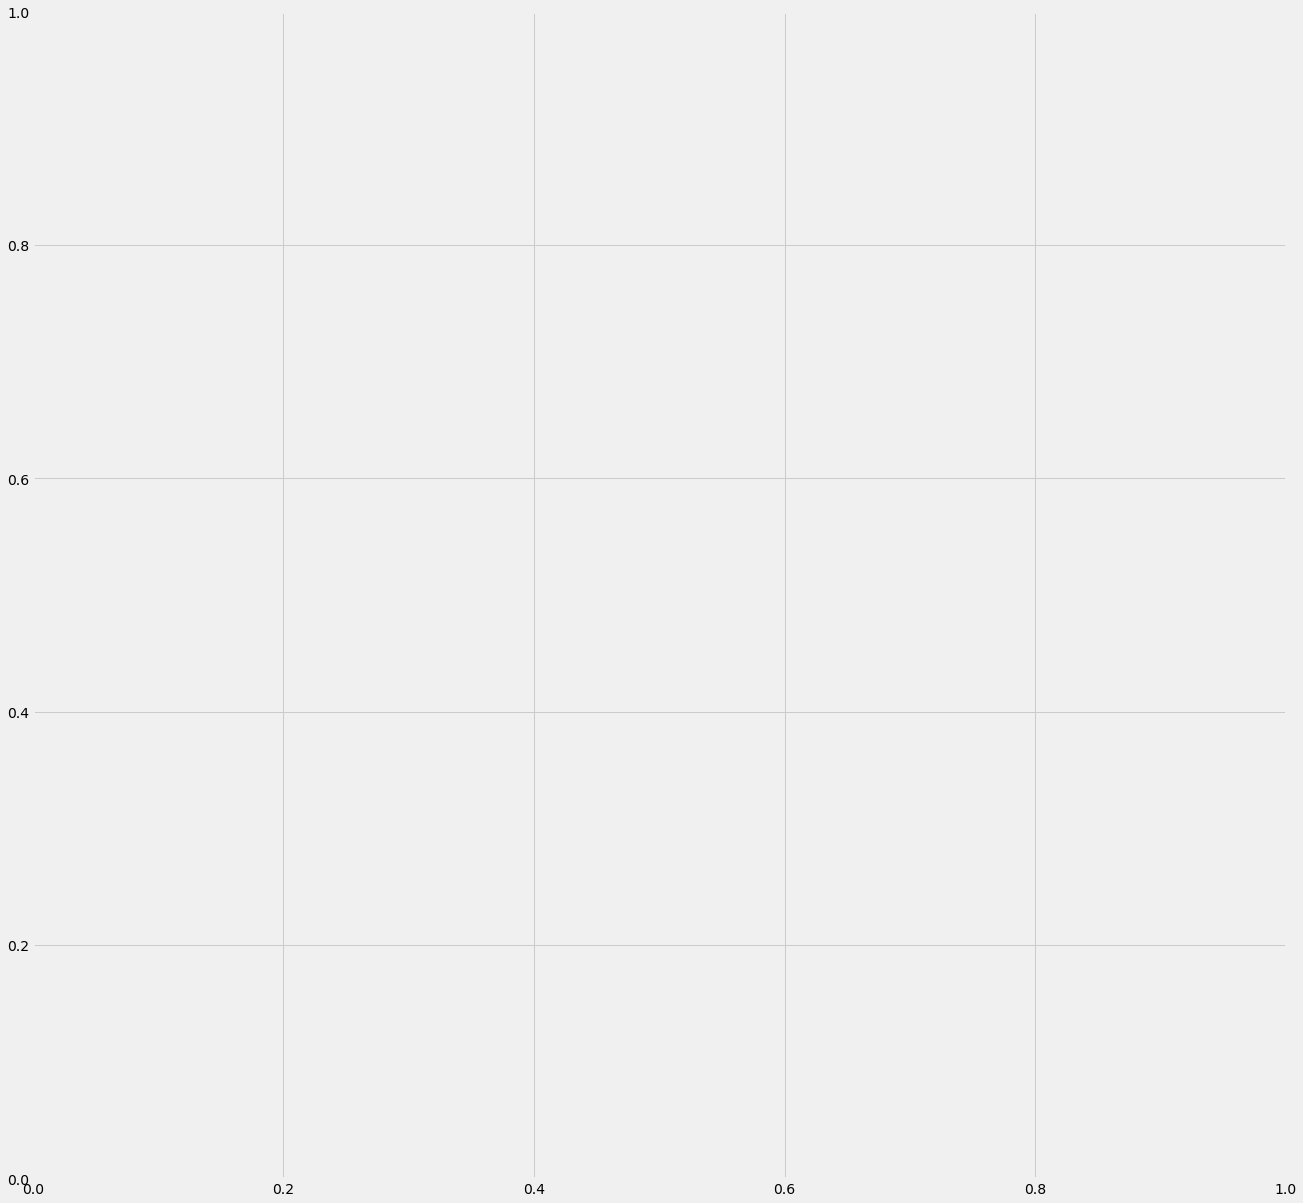

In [111]:
from sklearn.ensemble import RandomForestClassifier #Random Forest

f,ax=plt.subplots(figsize = (20,20))
model=RandomForestClassifier(n_estimators=500,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8)
ax.set_title('Feature Importance in Random Forests')

In [117]:
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=False)

contents_rn               0.019382
person_rn                 0.019144
contents_attribute_l_n    0.017933
contents_attribute_l_s    0.017182
D                         0.016606
                            ...   
person_prefer_d_2_728     0.000000
person_prefer_d_2_727     0.000000
person_prefer_d_2_723     0.000000
person_prefer_d_2_722     0.000000
person_prefer_d_3_227     0.000000
Length: 7201, dtype: float64

In [118]:
job_data['contents_attribute_l_n']

0         1607
1         1607
2         1599
3         1607
4         1607
          ... 
501946     352
501947     155
501948     437
501949     659
501950     785
Name: contents_attribute_l_n, Length: 501951, dtype: int64